# Importing required packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import datasets
dir(datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

# Step-1 : Loading the data

- In ANN we used fashion MNIST data set

- In CNN will use Cifar10 dataset

In [3]:
datasets.cifar10.load_data

<function keras.src.datasets.cifar10.load_data()>

Here we use a dataset name : CIFAR

It containes 60000 images and 10 classes

Each class containes 6000 images

Data set is divided into two parts training images: 50,000

testing images: 10,000

In [4]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Step-2 : Understanding Data

- Data dimensions 3 means : (n,w,h)

    - n= no of images

    - h = height of the image

    - w = width of the image

- Data dimensions 4 means : (n,w,h,c)

    - n= no of images

    - h = height of the image

    - w = width of the image

    - c = no of channels

- Mnist data image shape : 28*28

- Cifar data image shape : 32*32

In [5]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
X_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
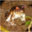

In [7]:
X_train[0]

- in mnist data the lables are in single list

- but in cifar data the lables are presented as list in list

In [8]:
y_train   # list in list

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
y_train[0][0]

np.uint8(6)

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]], dtype=uint8)
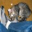

In [10]:
X_test[0]

In [11]:
y_test  # list in list

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [12]:
y_test[0][0]

np.uint8(3)

# Step-3 : Ploting the images

In [13]:
class_names=['airplane','automobile','bird','cat','deer','dog',
             'frog','horse','ship','truck']
len(class_names)

10

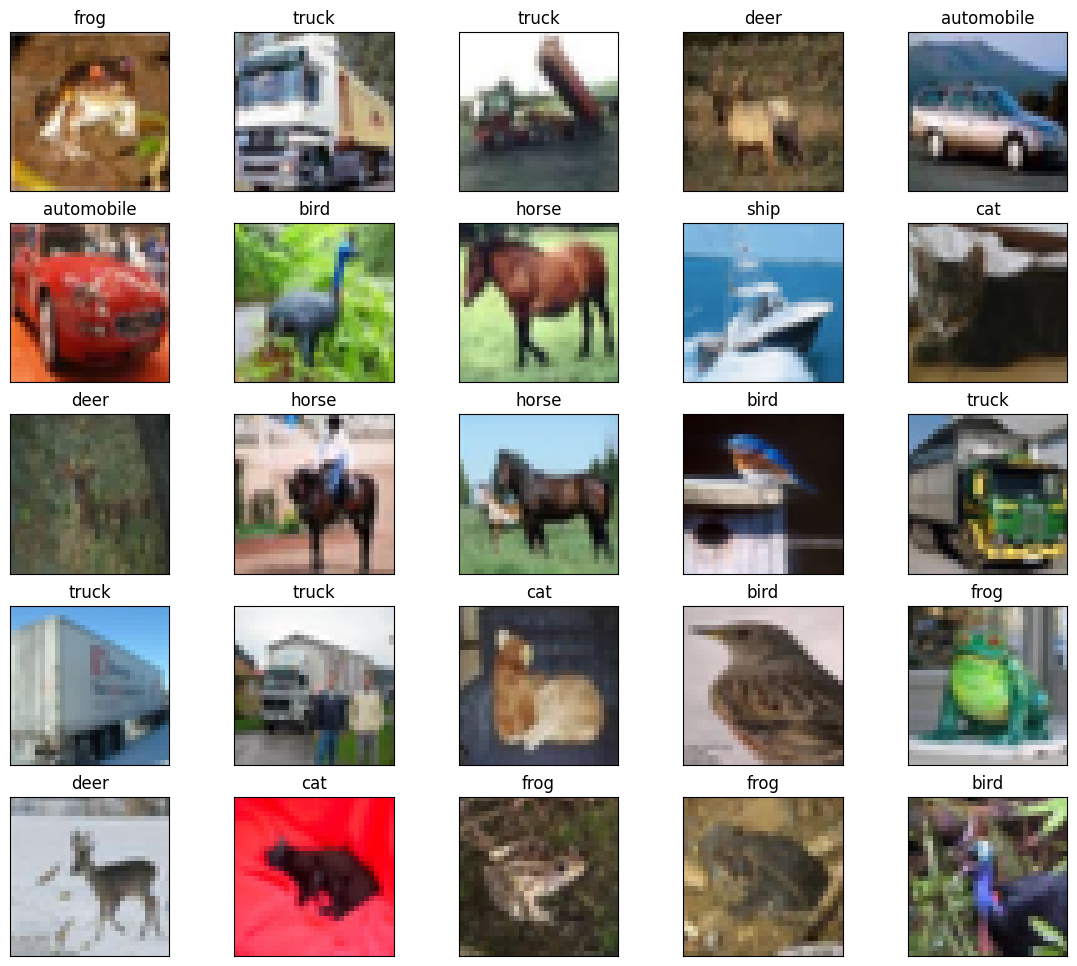

In [14]:
plt.figure(figsize=(14,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i][0]])
plt.show()

# Step-4 : Model Development

**Create the CNN network**

- Convolution

- Activation

- Striding (default =1) (not necessary to provide)

- Padding (not necessary to provide)

- pooling

**Conv2D**: Images  Height,width,channel

1.   List item
2.   List item



**Conv3d**: Videos frames,Height,width,channel

In [15]:
from tensorflow.keras import datasets, layers,models
model=models.Sequential()

#######################################################################################
model.add(layers.Conv2D(32, # filters
                       (3,3),  # filter size / kernal size
                       activation='relu',
                       input_shape=(32,32,3)
                       ))   # Stride / padding : default

model.add(layers.MaxPool2D((2,2)))   # Shape of the pool

#########################################################################################
model.add(layers.Conv2D(64, # filters
                       (3,3), # filter size / kernal size
                       activation='relu'))  # stride / padding : default

model.add(layers.MaxPool2D((2,2)))

#########################################################################################

model.add(layers.Conv2D(64, # filters
                       (3,3), # filter size / kernal size
                       activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step-5 : Model Summary

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

- Netral Network Layers

In [17]:
model.add(layers.Flatten())   # After convolution  ==== Fully connect layer
# no need of input shape here
model.add(layers.Dense(64,activation='relu'))  # Hidden layer 64 neurons, relu activation

model.add(layers.Dense(10,activation='softmax'))  # 10 classes so 10 neurons , softmax activation function

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Step-6 : Model Compile

In [19]:
model.compile(optimizer='adam',  # optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])  # metric

# Step-7 : Model Fit

In [20]:
history=model.fit(X_train,
                  y_train,
                  epochs=20,
                  validation_data=(X_test, y_test))

# 1 epoch= one forward pass + one backward pass
# Total train images are 50000
# By default batch size =32
# 50000/32~=1563 batches

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3149 - loss: 2.3658 - val_accuracy: 0.5168 - val_loss: 1.3521
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5292 - loss: 1.3167 - val_accuracy: 0.5718 - val_loss: 1.2080
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5923 - loss: 1.1632 - val_accuracy: 0.6183 - val_loss: 1.1095
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6349 - loss: 1.0432 - val_accuracy: 0.6341 - val_loss: 1.0778
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6621 - loss: 0.9673 - val_accuracy: 0.6490 - val_loss: 1.0334
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6877 - loss: 0.8899 - val_accuracy: 0.6538 - val_loss: 1.0201
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7121 - loss: 0.8250 - val_accuracy: 0.6614 - val_loss: 1.0241
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7318 - loss: 0.7653 - val_acc

In [21]:
history.history

{'accuracy': [0.3998199999332428,
  0.5418400168418884,
  0.5999600291252136,
  0.6352199912071228,
  0.6623600125312805,
  0.6842799782752991,
  0.7038800120353699,
  0.7210400104522705,
  0.7351599931716919,
  0.7529399991035461,
  0.7626199722290039,
  0.7691599726676941,
  0.7805399894714355,
  0.7914999723434448,
  0.8034399747848511,
  0.809440016746521,
  0.8160799741744995,
  0.8203200101852417,
  0.826200008392334,
  0.8337799906730652],
 'loss': [1.719329833984375,
  1.290639042854309,
  1.142542839050293,
  1.0483754873275757,
  0.9714547395706177,
  0.9071177840232849,
  0.8502238988876343,
  0.8007277846336365,
  0.7586954832077026,
  0.7079002857208252,
  0.676464319229126,
  0.6570187211036682,
  0.6223759651184082,
  0.5943830013275146,
  0.5646296739578247,
  0.549571692943573,
  0.5237460136413574,
  0.5113211870193481,
  0.49219441413879395,
  0.4734450876712799],
 'val_accuracy': [0.5167999863624573,
  0.5717999935150146,
  0.6183000206947327,
  0.6341000199317932,


Text(0.5, 0, 'Epoch')

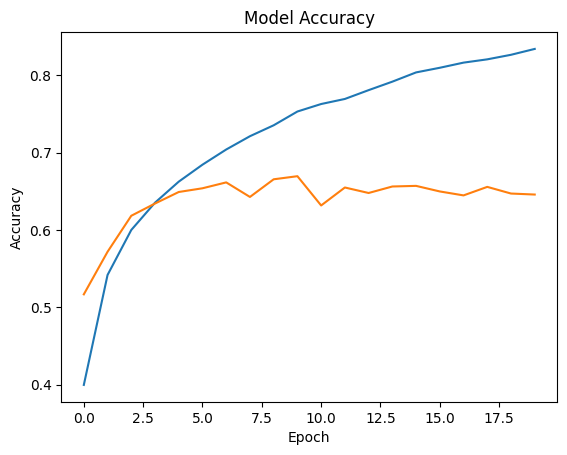

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

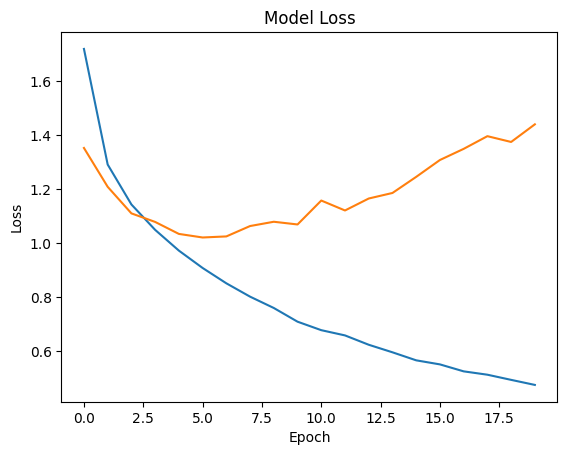

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Step-8 : Model evaluate

In [24]:
test_acc,test_loss=model.evaluate(X_test,y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6496 - loss: 1.4233
1.4397423267364502


# Step-9 : Model predict

In [25]:
y_pred=model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[9.9346638e-03, 4.1350478e-04, 7.9909950e-02, ..., 2.2915246e-02,
        7.9703201e-03, 2.2379004e-03],
       [1.1446595e-02, 1.8238990e-03, 5.6657893e-05, ..., 8.3484076e-05,
        9.8585802e-01, 1.8267531e-04],
       [2.3613590e-01, 1.1869328e-02, 1.8292922e-01, ..., 1.3639635e-01,
        5.3710103e-02, 2.4113888e-01],
       ...,
       [3.7973194e-08, 9.1519624e-08, 5.2214623e-03, ..., 1.1086077e-02,
        6.5238673e-08, 5.6377134e-09],
       [9.1475391e-01, 3.4127883e-03, 7.9440445e-02, ..., 2.0753138e-10,
        4.7393576e-05, 2.1446432e-08],
       [8.1845541e-10, 1.8187587e-20, 5.2411053e-09, ..., 9.9985969e-01,
        3.0159087e-16, 7.4584768e-14]], dtype=float32)

In [26]:
max_prob=[np.max(i) for i in y_pred]
index=[np.argmax(i) for i in y_pred]
pred_class=[class_names[i] for i in index]
actual_class=[class_names[i[0]] for i in y_test]

df1=pd.DataFrame(data=zip(max_prob,index,pred_class,actual_class),
                 columns=['Max_prob','Index','Pred_class','Actual_class'])

con=df1['Actual_class']==df1['Pred_class']
df1['Output']=np.where(con,1,0)
df1

,Max_prob,Index,Pred_class,Actual_class,Output
0,0.822015,3,cat,cat,1
1,0.985858,8,ship,ship,1
2,0.241139,9,truck,ship,0
3,0.981662,0,airplane,airplane,1
4,0.462593,6,frog,frog,1
...,...,...,...,...,...
9995,0.410708,3,cat,ship,0
9996,0.956053,3,cat,cat,1
9997,0.983294,5,dog,dog,1
9998,0.914754,0,airplane,automobile,0


In [27]:
acc=df1['Output'].sum()/len(df1)
acc

np.float64(0.6457)

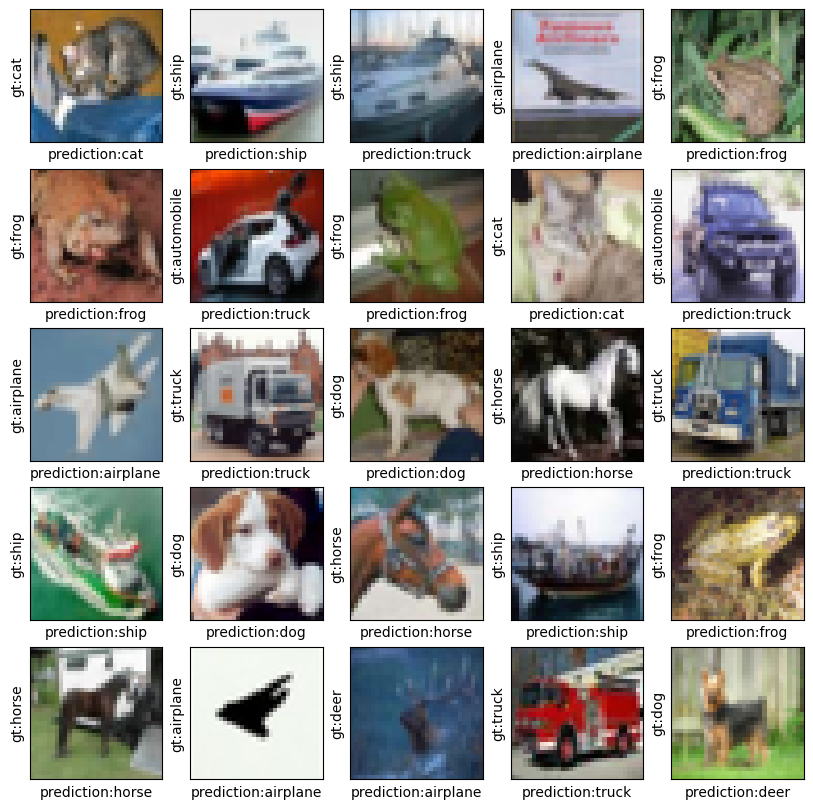

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(f'prediction:{class_names[np.argmax(y_pred[i])]}')
    plt.ylabel(f'gt:{class_names[y_test[i][0]]}')
plt.show()

# Stpe-10 : Model Saving

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

In [33]:
model.save('CNN.keras')

In [34]:
model.save('CNN.h5')

# Evaluating in unseen data

- Step-1 : load the image

array([[[ 36,  53,  42],
        [ 37,  54,  43],
        [ 38,  55,  44],
        ...,
        [156, 164, 163],
        [156, 164, 163],
        [155, 163, 162]],

       [[ 37,  54,  43],
        [ 38,  55,  44],
        [ 39,  56,  45],
        ...,
        [156, 164, 163],
        [156, 164, 163],
        [155, 163, 162]],

       [[ 39,  56,  45],
        [ 40,  57,  46],
        [ 41,  58,  47],
        ...,
        [156, 164, 163],
        [156, 164, 163],
        [156, 164, 163]],

       ...,

       [[133, 146, 172],
        [134, 147, 173],
        [135, 150, 176],
        ...,
        [167, 177, 207],
        [148, 158, 188],
        [112, 122, 152]],

       [[113, 127, 150],
        [119, 133, 155],
        [123, 140, 161],
        ...,
        [152, 163, 190],
        [147, 158, 185],
        [129, 140, 167]],

       [[ 78,  92, 114],
        [ 88, 103, 122],
        [ 99, 116, 135],
        ...,
        [139, 149, 173],
        [143, 153, 177],
        [139, 149, 173]]], dtype=uint8)
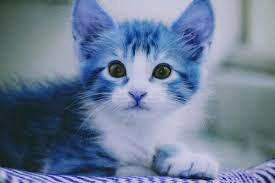

In [36]:
import cv2
img=cv2.imread('/content/cat.jpeg')
img

In [39]:
img.shape

(183, 275, 3)

- Step-2 : Resizing the image

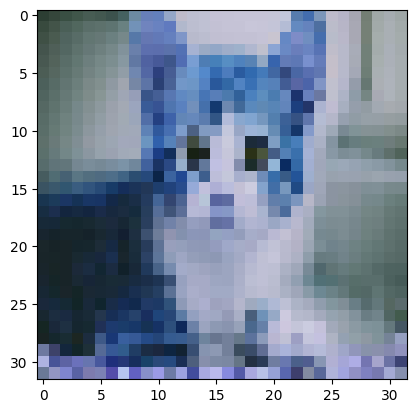

In [59]:
resized_img=cv2.resize(img,(32,32))
plt.imshow(resized_img)

In [60]:
resized_img.shape

(32, 32, 3)

- Step-3 : Reshaping the image

In [61]:
reshape_img=resized_img.reshape(1,32,32,3)
reshape_img.shape

(1, 32, 32, 3)

- Step-4: Load the saved model

In [62]:

from tensorflow.keras.models import load_model
loaded_model=load_model('CNN.keras')
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

- Step-5 : Predicting from loaded model

In [63]:
pred=loaded_model.predict(reshape_img)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


array([[2.2245190e-01, 2.6819861e-04, 3.2617971e-02, 3.1291357e-01,
        5.0826278e-04, 2.5952557e-01, 7.3168725e-05, 8.7556718e-03,
        1.3085906e-01, 3.2026730e-02]], dtype=float32)

In [64]:
np.max(pred)

np.float32(0.31291357)

In [65]:
np.argmax(pred)

np.int64(3)

In [66]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [67]:
class_names[np.argmax(pred)]

'cat'